In [68]:
import os
os.chdir("C:/Users/TTBDONMEZ/Desktop/UDACITY_DATA_SCIENTIST/TheDataScienceProcess")

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from googletrans import Translator

city_based_prices =  pd.read_csv('./seattle-listings.csv',usecols=['city','price'])

In [70]:
city_based_prices.head()

,city,price
0,Seattle,$85.00
1,Seattle,$150.00
2,Seattle,$975.00
3,Seattle,$100.00
4,Seattle,$450.00


In [71]:
#checking if there are nulls in the data
city_based_prices.isnull().sum()

city     0
price    0
dtype: int64

In [72]:
#price object has wrong data type, firstly we need to fix it, with below function

def get_floatPrice(df):
    '''
    INPUT - df - pandas dataframe with the price data type object
           
    OUTPUT -df - pandas dataframe with the price data type float
    '''
    df['price'] = df['price'].map(lambda x: x.replace("$",""))
    
    df['price'] = df['price'].map(lambda x: x.replace(".",""))
    
    df['price'] = df['price'].map(lambda x: x.replace(",",""))
    
    df['price'] = df['price'].apply(lambda x: float(x))
    
    df['price'] = df['price']/100
    
    df=df
    
    return df

In [73]:
get_floatPrice(city_based_prices)

,city,price
0,Seattle,85.0
1,Seattle,150.0
2,Seattle,975.0
3,Seattle,100.0
4,Seattle,450.0
...,...,...
3813,Seattle,359.0
3814,Seattle,79.0
3815,Seattle,93.0
3816,Seattle,99.0


In [74]:
#because of the space at the end of Seattle, grouping would not work properly , so we fixed it by replacing 
city_based_prices['city']=city_based_prices['city'].replace("Seattle ","Seattle")

In [75]:
#because of the little letter of seattle, grouping would not work properly , so we fixed it by replacing 
city_based_prices['city']=city_based_prices['city'].replace("seattle","Seattle")

In [82]:
city_based_prices['city']=city_based_prices['city'].replace("西雅图","Seattle")

In [83]:
city_based_prices=pd.DataFrame(city_based_prices.groupby(['city'])['price'].mean())

In [84]:
city_based_prices

,price
city,
"Ballard, Seattle",116.000000
Phinney Ridge Seattle,60.000000
Seattle,128.006555
West Seattle,110.000000


(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

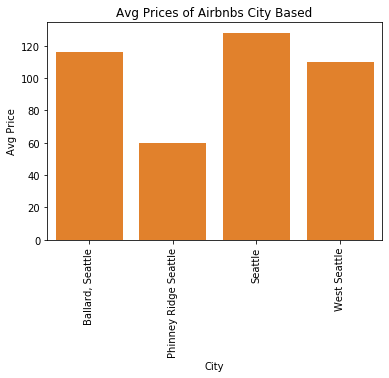

In [85]:
base_color = sns.color_palette()[1]

sns.barplot(city_based_prices.index.values,city_based_prices.price,color = base_color)
plt.xlabel('City')
plt.ylabel('Avg Price')
plt.title('Avg Prices of Airbnbs City Based')
plt.xticks(rotation = 90)